In [33]:
import lightkurve as lk
from apertureoptimizer import ApertureOptimizer

# Download KOI 6.01, an exoplanet False Positive
tpf = lk.search_targetpixelfile(8878187, quarter=10).download()

# Define a corrector function
def corrector(lc):
    clc = lc.copy().flatten(121, niters=4, sigma=4, break_tolerance=10).remove_outliers(sigma_upper=3, sigma_lower=5)
    return clc

In [34]:
period = 3.032145588
t0 = 2455004.734756 - 2454833
duration =  0.153183

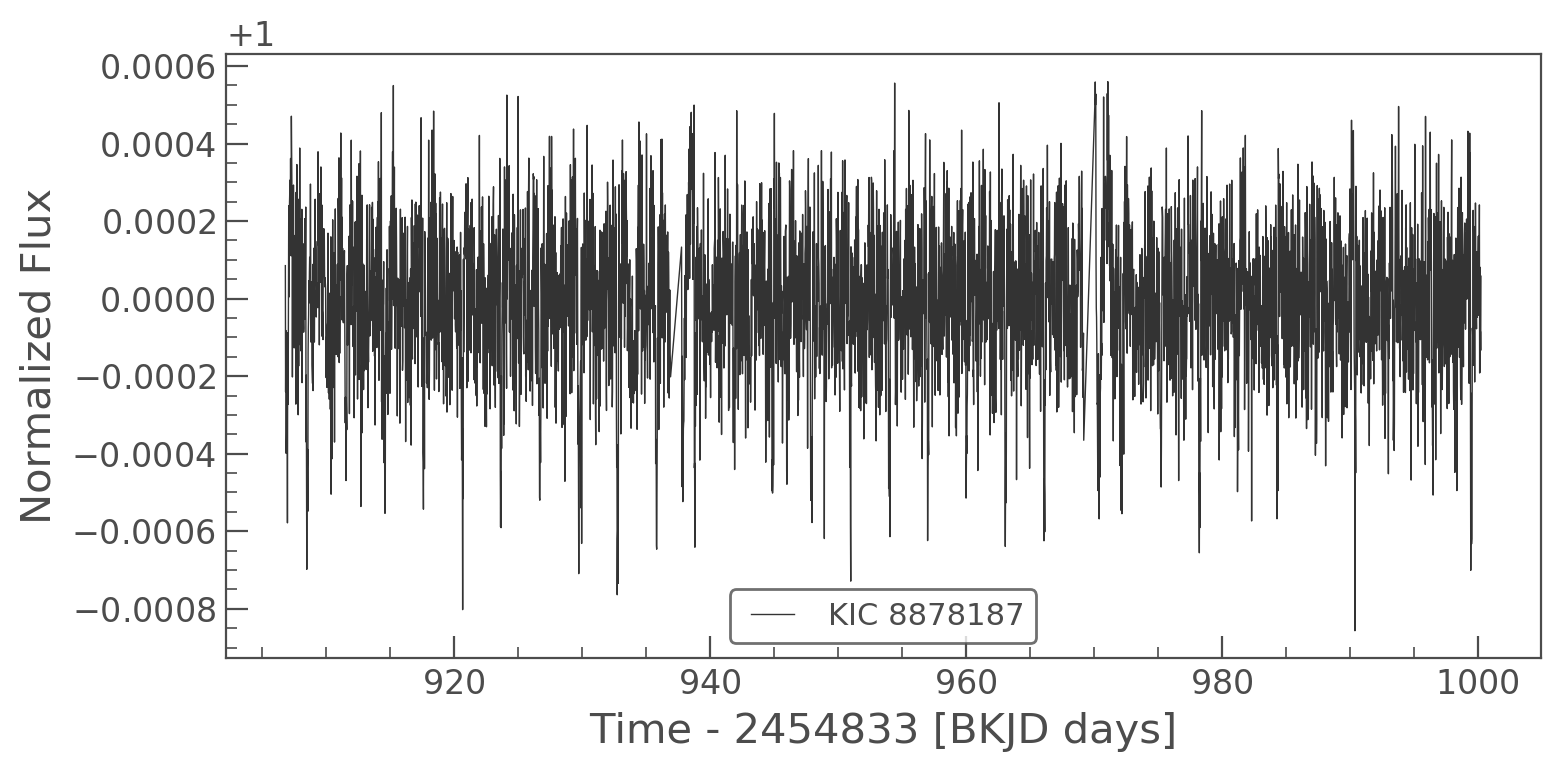

In [35]:
corrector(tpf.to_lightcurve()).plot()

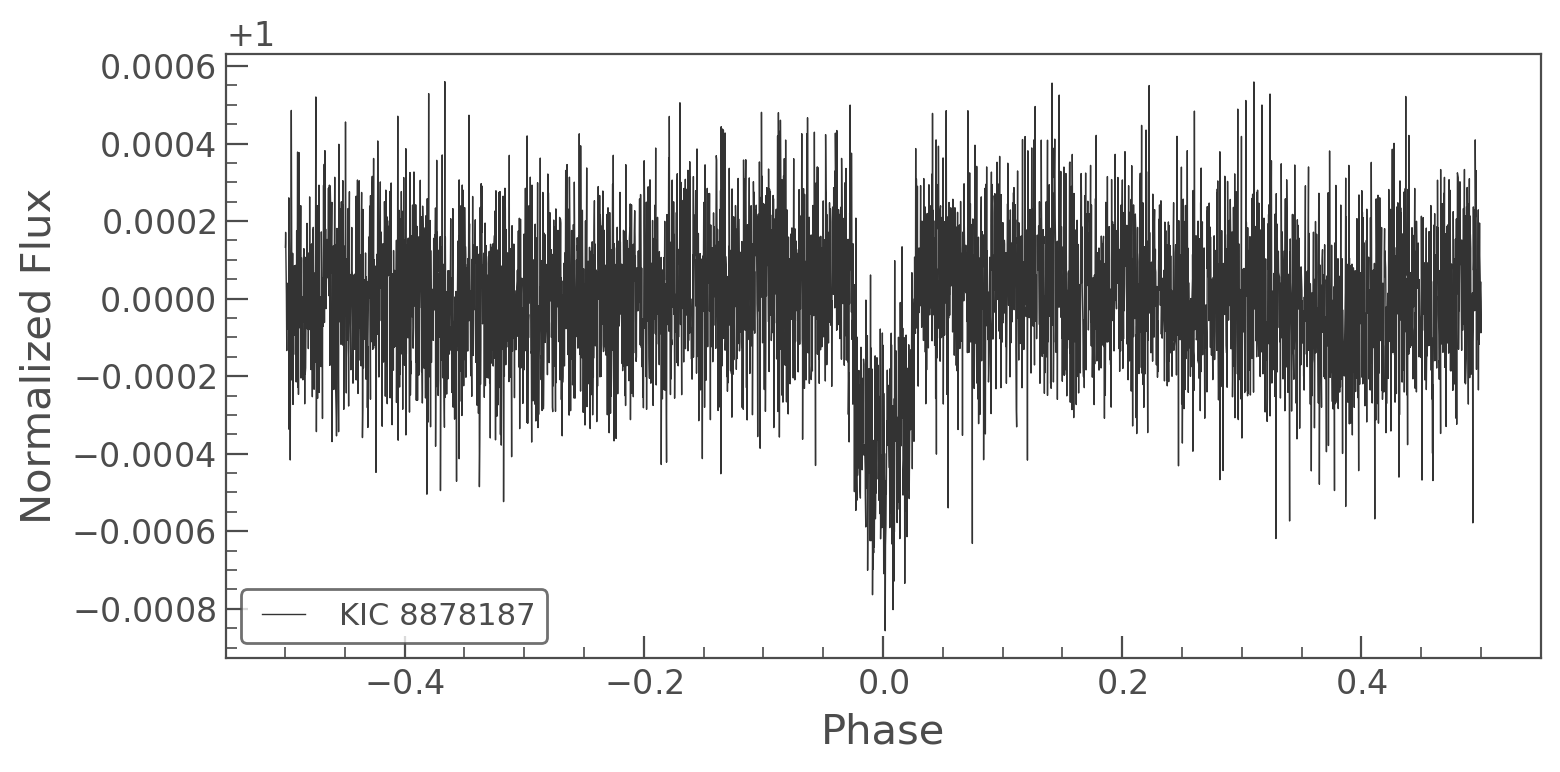

In [36]:
corrector(tpf.to_lightcurve()).fold(period, t0).plot()


Searching Neighbours...:  90%|█████████ | 18/20 [00:03<00:00,  5.21it/s]


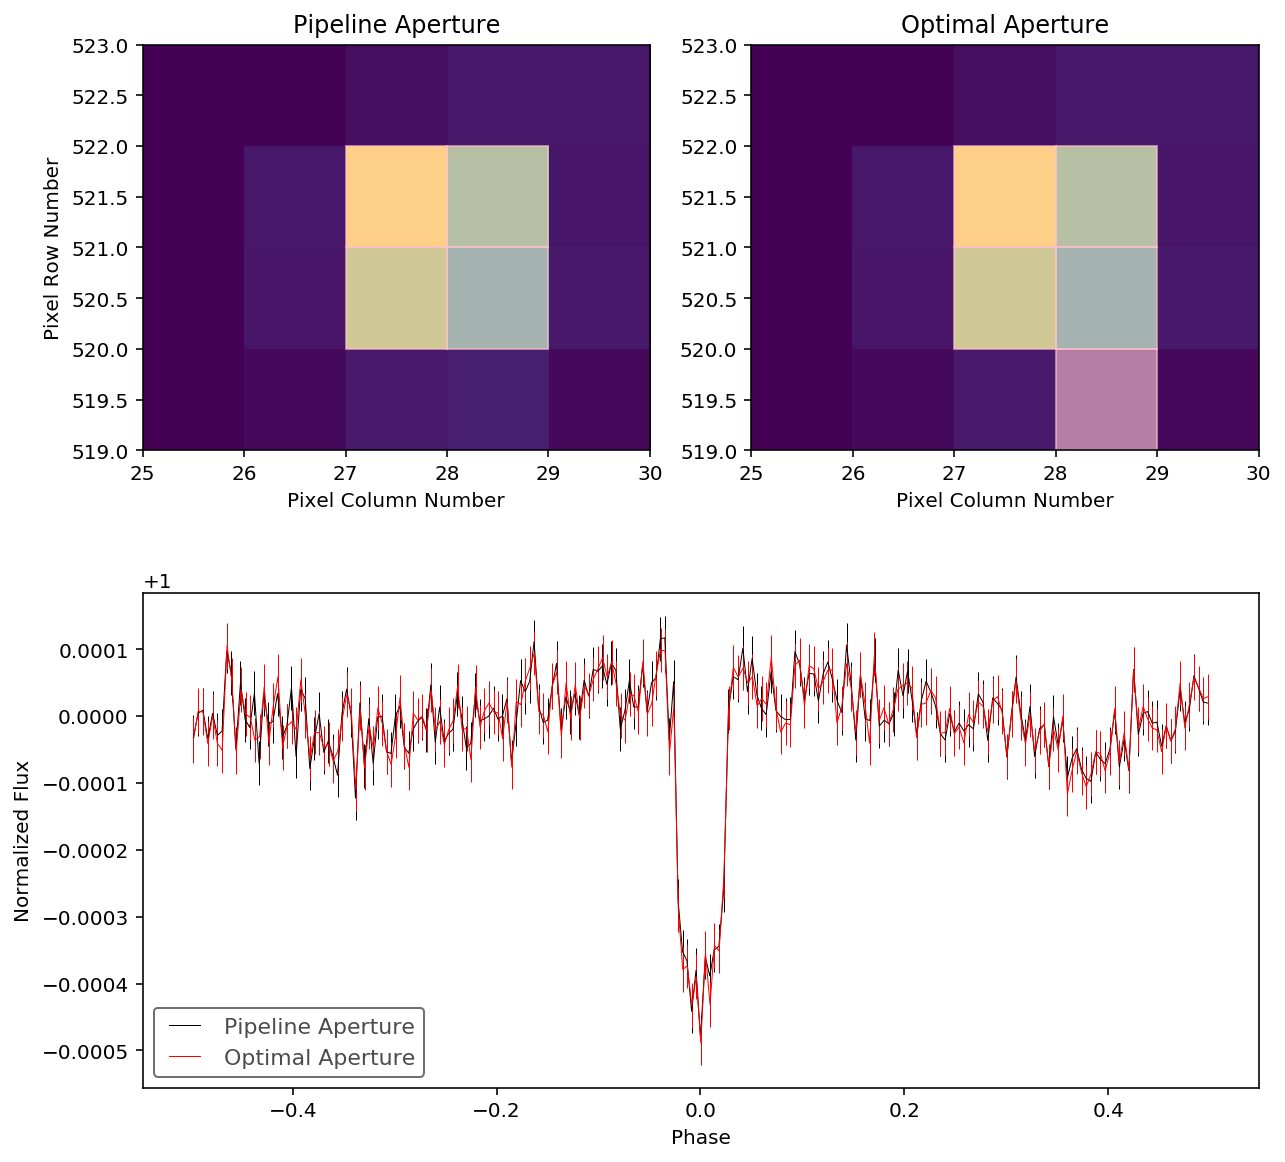

In [37]:
# Make an ApertureOptimizer Class, pass in the False Positive parameters
a = ApertureOptimizer(tpf, period, t0, duration, corrector=corrector)

# Optimize the aperture
a.optimize()

# Plot the results
a.plot_results(bin=20)

# Use the best light curve as you normally would.
lc = a.best_lc

(-0.1, 0.1)

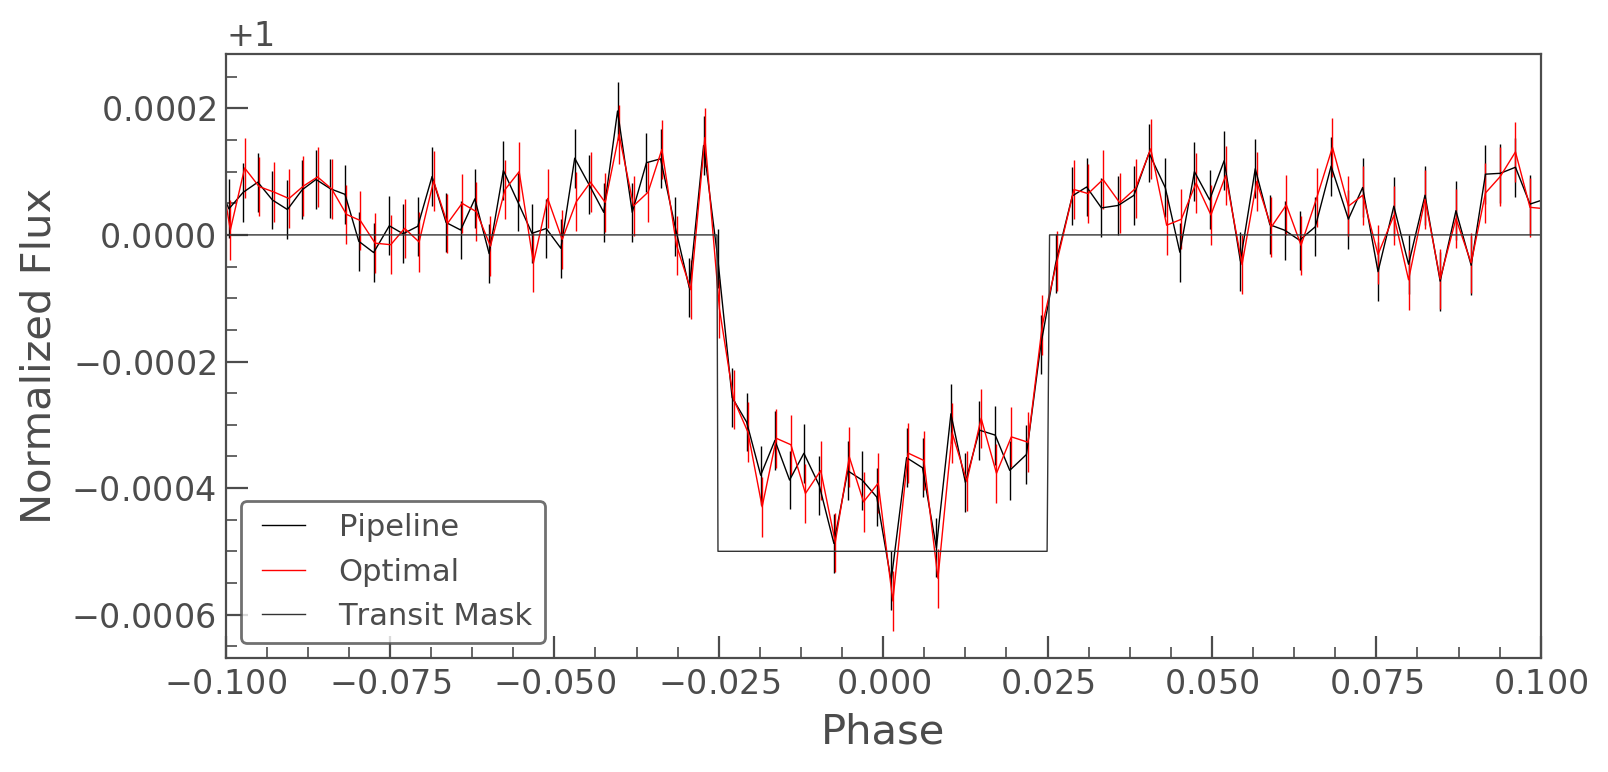

In [39]:
import matplotlib.pyplot as plt
bin = 10
ax = a.starting_lc.fold(period, t0).bin(bin).errorbar(c='k', label='')
a.starting_lc.fold(period, t0).bin(bin).plot(c='k', ax=ax, label='Pipeline')


a.best_lc.fold(period, t0).bin(bin).errorbar(ax=ax, c='r', label='')
a.best_lc.fold(period, t0).bin(bin).plot(ax=ax, c='r', label='Optimal')

lk.LightCurve(a.best_lc.time, a.mask(a.best_lc.time) * 0.0005 + 1).fold(period, t0).plot(ax=ax, label='Transit Mask')
plt.xlim(-0.1, 0.1)

